In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold

In [50]:
data = pd.read_csv('mwd_assay_Four_datasets_modeling_without_filtering.csv', delimiter=';')
data

,hole,from,to,drate,perc-p,feed-p,flushp,rot-p,damp-p,hardn,Label,fark
0,S-0002-223,0.000,0.050,1.810,136.593,6.822,4.376,49.837,48.747,-99.999,Shale+sandy shale,0.107
1,S-0002-223,0.050,0.110,1.932,128.191,21.218,4.483,46.756,48.901,4.495,Shale+sandy shale,0.031
2,S-0002-223,0.110,0.180,3.856,127.417,23.050,4.514,54.219,49.511,11.227,Shale+sandy shale,0.015
3,S-0002-223,0.180,0.230,3.438,127.007,24.288,4.529,69.309,48.930,9.783,Shale+sandy shale,0.015
4,S-0002-223,0.230,0.290,2.189,128.422,18.129,4.544,46.741,48.323,5.390,Shale+sandy shale,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
15080,S-1249-52a,8.209,8.264,1.525,186.694,29.030,5.860,72.449,46.543,1.665,Shale+sandy shale,0.015
15081,S-1249-52a,8.264,8.318,1.734,153.945,36.831,5.875,69.716,47.608,3.318,Shale+sandy shale,0.016
15082,S-1249-52a,8.318,8.373,1.647,164.863,39.429,5.891,59.113,49.569,2.708,Shale+sandy shale,0.031
15083,S-1249-52a,8.373,8.424,1.432,193.654,40.387,5.860,69.247,47.923,1.149,Shale+sandy shale,0.015


In [51]:
index_hardn = data[data['hardn']== -99.999].index

In [52]:
data = data.drop(index= index_hardn)

In [53]:
index_2 = data[data['hardn']== -999.999].index

In [54]:
data = data.drop(index=index_2)

In [55]:
data

,hole,from,to,drate,perc-p,feed-p,flushp,rot-p,damp-p,hardn,Label,fark
1,S-0002-223,0.050,0.110,1.932,128.191,21.218,4.483,46.756,48.901,4.495,Shale+sandy shale,0.031
2,S-0002-223,0.110,0.180,3.856,127.417,23.050,4.514,54.219,49.511,11.227,Shale+sandy shale,0.015
3,S-0002-223,0.180,0.230,3.438,127.007,24.288,4.529,69.309,48.930,9.783,Shale+sandy shale,0.015
4,S-0002-223,0.230,0.290,2.189,128.422,18.129,4.544,46.741,48.323,5.390,Shale+sandy shale,0.015
5,S-0002-223,0.290,0.350,3.267,127.561,28.159,4.529,67.411,48.775,9.174,Shale+sandy shale,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
15080,S-1249-52a,8.209,8.264,1.525,186.694,29.030,5.860,72.449,46.543,1.665,Shale+sandy shale,0.015
15081,S-1249-52a,8.264,8.318,1.734,153.945,36.831,5.875,69.716,47.608,3.318,Shale+sandy shale,0.016
15082,S-1249-52a,8.318,8.373,1.647,164.863,39.429,5.891,59.113,49.569,2.708,Shale+sandy shale,0.031
15083,S-1249-52a,8.373,8.424,1.432,193.654,40.387,5.860,69.247,47.923,1.149,Shale+sandy shale,0.015


In [6]:
data['hole'].unique()

array(['S-0002-223', 'S-0002-224', 'S-0002-225', 'S-0002-226',
       'S-0003-324', 'S-0003-325', 'S-0003-327', 'S-0004-89', 'S-0004-90',
       'S-0004-91', 'S-1314-51', 'S-1314-30', 'S-1314-50', 'S-1314-29',
       'S-1314-49', 'S-1314-28', 'S-1314-48', 'S-1314-27', 'S-1314-47',
       'S-1314-26', 'S-1314-46', 'S-1314-25', 'S-1314-45', 'S-1314-24',
       'S-1314-44', 'S-1314-23', 'S-1314-43', 'S-1314-22', 'S-1314-42',
       'S-1314-21', 'S-1314-81', 'S-1314-41', 'S-1314-7', 'S-1314-8',
       'S-1314-33', 'S-1314-9', 'S-1314-34', 'S-1314-10', 'S-1314-35',
       'S-1314-11', 'S-1314-36', 'S-1314-12', 'S-1314-37', 'S-1314-13',
       'S-1314-38', 'S-1314-14', 'S-1314-39', 'S-1314-15', 'S-1314-40',
       'S-1233-81', 'S-1233-80', 'S-1233-79', 'S-1217-42', 'S-1217-44b',
       'S-1217-47b', 'S-1217-49b', 'S-1217-58', 'S-1217-60', 'S-1217-61',
       'S-1217-62', 'S-1217-82', 'S-1217-83', 'S-1217-84', 'S-1217-86b',
       'S-1217-88b', 'S-1217-89b', 'S-1217-99', 'S-1249-50a',
       

In [10]:
S_0002_223 = data[data['hole'] == 'S-0002-223']
S_0002_223

,hole,from,to,drate,perc-p,feed-p,flushp,rot-p,damp-p,hardn,Label
0,S-0002-223,0.00,0.05,1.810,136.593,6.822,4.376,49.837,48.747,-99.999,Shale+sandy shale
1,S-0002-223,0.05,0.11,1.932,128.191,21.218,4.483,46.756,48.901,4.495,Shale+sandy shale
2,S-0002-223,0.11,0.18,3.856,127.417,23.050,4.514,54.219,49.511,11.227,Shale+sandy shale
3,S-0002-223,0.18,0.23,3.438,127.007,24.288,4.529,69.309,48.930,9.783,Shale+sandy shale
4,S-0002-223,0.23,0.29,2.189,128.422,18.129,4.544,46.741,48.323,5.390,Shale+sandy shale
...,...,...,...,...,...,...,...,...,...,...,...
179,S-0002-223,9.63,9.68,1.141,208.100,56.162,5.921,56.937,65.884,-0.236,Quartz
180,S-0002-223,9.68,9.74,1.077,207.466,57.781,5.921,57.053,68.303,-0.440,Quartz
181,S-0002-223,9.74,9.79,1.103,207.702,56.077,5.921,56.289,65.647,-0.355,Quartz
182,S-0002-223,9.79,9.84,1.103,207.631,57.076,5.921,55.776,66.636,-0.351,Quartz


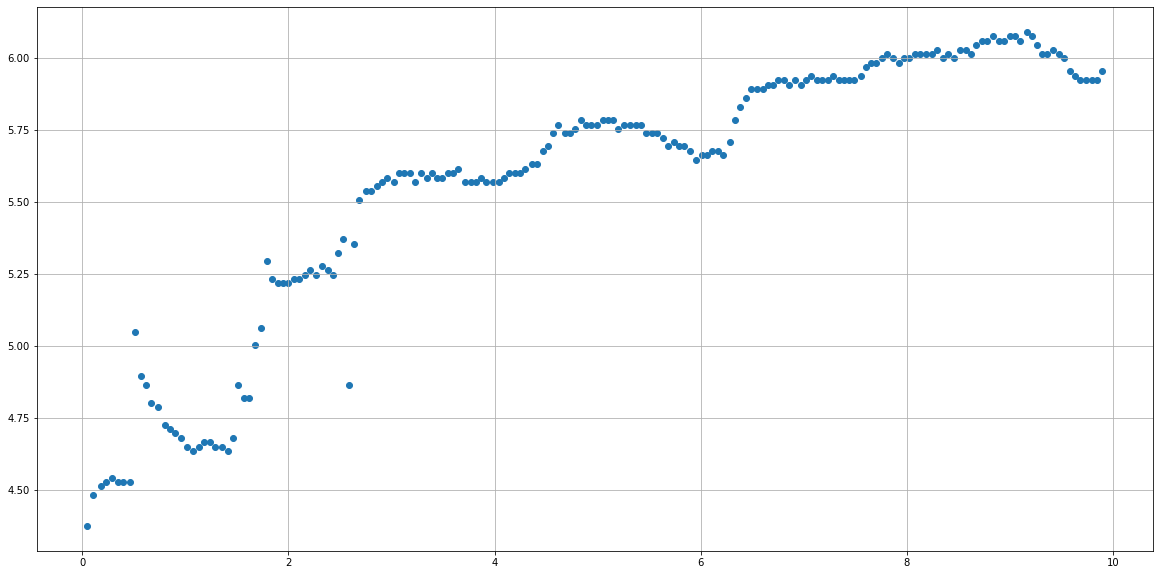

In [17]:
plt.figure(figsize=(20,10))
plt.grid(axis='both', which = 'both')
plt.scatter(S_0002_223['to'], S_0002_223['flushp'])

In [18]:
S_0003_324 = data[data['hole'] == 'S-0003-324']


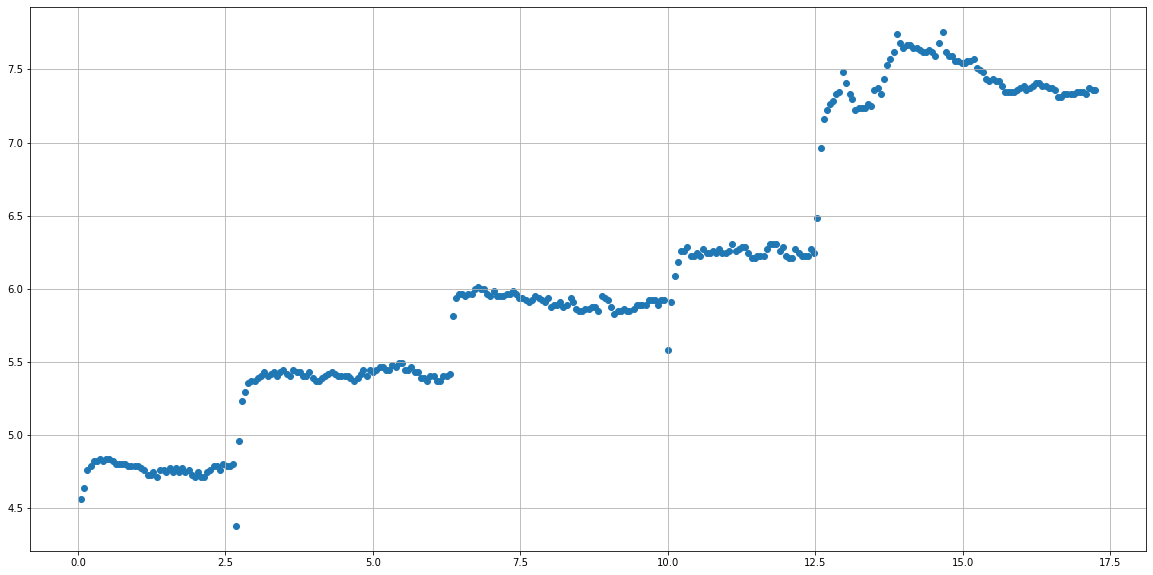

In [19]:
plt.figure(figsize=(20,10))
plt.grid(axis='both', which = 'both')
plt.scatter(S_0003_324['to'], S_0003_324['flushp'])

In [26]:
S_0003_327 = data[data['hole'] == 'S-0003-327']
S_0003_327[45:55]

,hole,from,to,drate,perc-p,feed-p,flushp,rot-p,damp-p,hardn,Label
1431,S-0003-327,2.44,2.50,1.848,136.081,34.077,5.523,62.443,47.074,4.049,Shale+sandy shale
1432,S-0003-327,2.50,2.55,1.699,177.418,47.213,5.508,69.494,53.618,2.366,Shale+sandy shale
1433,S-0003-327,2.55,2.61,1.647,134.593,33.827,4.605,49.525,49.235,3.394,Shale+sandy shale
1434,S-0003-327,2.61,2.67,1.139,134.514,38.739,5.462,59.755,48.256,1.627,Shale+sandy shale
1435,S-0003-327,2.67,2.72,1.478,133.201,37.797,5.722,56.878,47.891,2.847,Shale+sandy shale
1436,S-0003-327,2.72,2.77,1.736,146.110,35.317,5.799,63.536,47.367,3.384,Shale+sandy shale
1437,S-0003-327,2.77,2.82,1.544,175.163,47.116,5.829,60.829,48.784,1.897,Shale+sandy shale
1438,S-0003-327,2.82,2.88,1.932,147.111,33.679,5.891,67.214,47.079,4.043,Shale+sandy shale
1439,S-0003-327,2.88,2.94,1.516,153.906,42.928,5.875,56.537,52.143,2.402,Shale+sandy shale
1440,S-0003-327,2.94,2.99,1.757,192.761,39.419,5.860,58.419,48.866,2.149,Shale+sandy shale


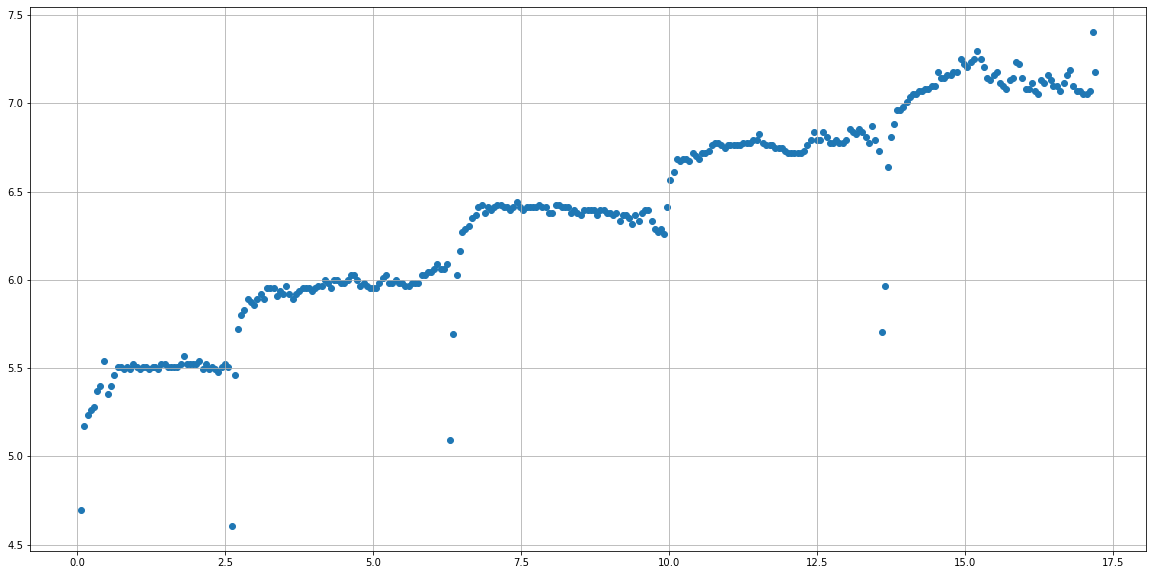

In [28]:
plt.figure(figsize=(20,10))
plt.grid(axis='both', which = 'both')
plt.scatter(S_0003_327['to'], S_0003_327['flushp'])

In [47]:
S_1314_43 = data[data['hole'] == 'S-1314-43']
S_1314_43

,hole,from,to,drate,perc-p,feed-p,flushp,rot-p,damp-p,hardn,Label
6863,S-1314-43,0.139,0.200,1.064,128.833,15.483,5.034,36.002,44.348,1.454,Quartz
6864,S-1314-43,0.200,0.255,1.114,130.115,18.663,5.141,35.657,44.470,1.593,Quartz
6865,S-1314-43,0.255,0.308,0.998,129.884,32.494,5.156,70.403,45.239,1.197,Quartz
6866,S-1314-43,0.308,0.361,0.814,129.740,32.477,5.217,54.939,46.180,0.561,Quartz
6867,S-1314-43,0.361,0.415,0.998,129.581,39.585,5.233,55.089,54.334,1.209,Quartz
...,...,...,...,...,...,...,...,...,...,...,...
7127,S-1314-43,14.090,14.145,1.471,199.158,53.657,6.564,52.492,59.116,1.296,Quartz
7128,S-1314-43,14.145,14.196,1.207,198.513,56.375,6.533,51.494,63.292,0.395,Quartz
7129,S-1314-43,14.196,14.249,1.330,198.640,55.809,6.518,53.210,60.876,0.822,Quartz
7130,S-1314-43,14.249,14.301,1.287,198.497,55.824,6.564,52.981,61.484,0.678,Quartz


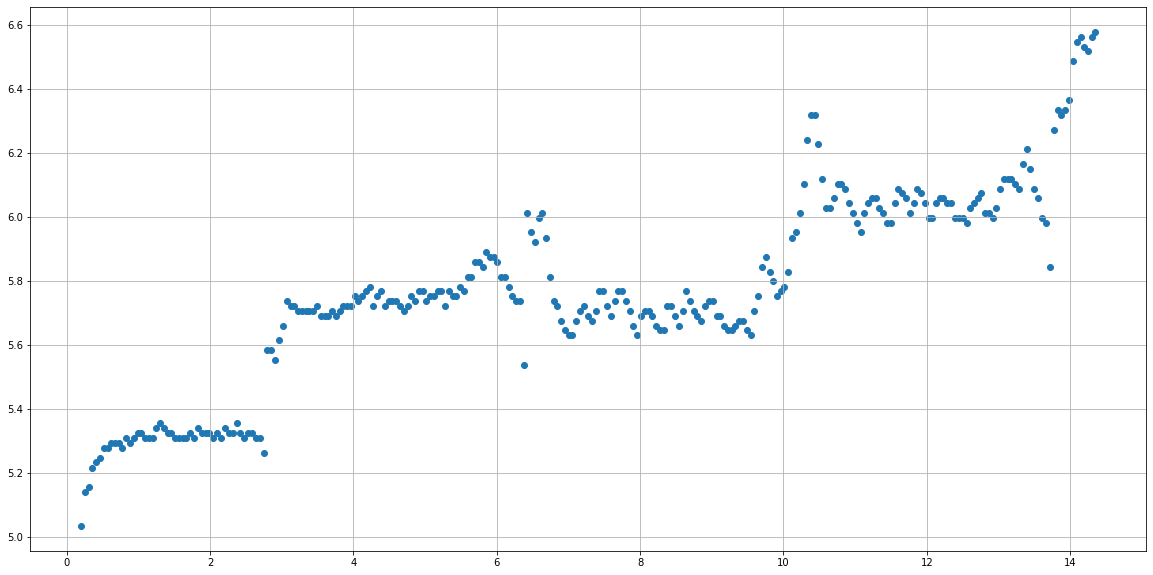

In [48]:
plt.figure(figsize=(20,10))
plt.grid(axis='both', which = 'both')
plt.scatter(S_1314_43['to'], S_1314_43['flushp'])

In [62]:
fark_index = data[data['fark'] >5].index
fark_index

Int64Index([ 2725,  3266,  3371,  3587,  3815,  4046,  4291,  4525,  4780,
             5030,  5273,  5527,  5781,  6053,  6327,  6593,  6860,  7131,
             7396,  7672,  7936,  8205,  8484,  8766,  9041,  9316,  9590,
             9607,  9876, 10150, 10421, 10699, 10966, 11239, 11503, 11763,
            12017, 12275, 12542, 13711, 13782, 13846, 13903, 13980, 14058,
            14136, 14216, 14300, 14383, 14466, 14541, 14611, 14678, 14762,
            15084],
           dtype='int64')

In [63]:
data = data.drop(index = fark_index)

(array([1.3829e+04, 4.5900e+02, 1.2400e+02, 8.8000e+01, 3.5000e+01,
        3.9000e+01, 1.8000e+01, 1.8000e+01, 1.1000e+01, 8.0000e+00,
        8.0000e+00, 8.0000e+00, 6.0000e+00, 8.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.     , 0.08446, 0.16892, 0.25338, 0.33784, 0.4223 , 0.50676,
        0.59122, 0.67568, 0.76014, 0.8446 , 0.92906, 1.01352, 1.09798,
        1.18244, 1.2669 , 1.35136, 1.43582, 1.52028, 1.60474, 1.6892 ,
        1.77366, 1.85812, 1.94258, 2.02704, 2.1115 , 2.19596, 2.28042,
        2.36488, 2.44934, 2.5338 ,

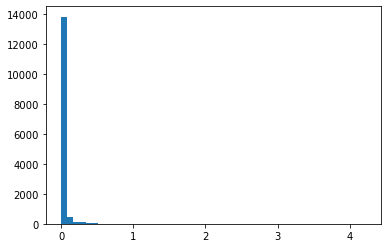

In [69]:
plt.hist(data['fark'], bins=50)

In [65]:
data['fark'].max()

4.223